# Using scipy

## Introduction : without units

Use the well known RC circuit as a use case : see [this post](https://medium.com/towards-data-science/interactive-plotting-the-well-know-rc-circuit-in-jupyter-d153c0e9d3a).

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x113fbda90>
   status: 0
  success: True
        t: array([0.00000000e+00, 7.59946138e-09, 1.51989228e-08, 2.50223573e-08,
       3.66479844e-08, 5.07872264e-08, 6.83868268e-08, 9.11738189e-08,
       1.00000000e-07])
 t_events: None
        y: array([[0.        , 0.53222838, 0.78118971, 0.91798159, 0.97425721,
        0.99363364, 0.99879816, 0.99977132, 0.99990535]])
 y_events: None

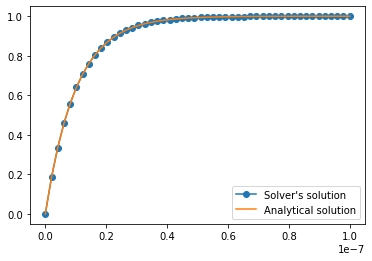

In [15]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
 
# in Ohms
R = 10000
# in Farad
capa = 1*10**-12
# time constant
tau= R*capa
# Source in volts
Ve = 1
# initial tension in volts
y0 = [0]
 
def analytical_solution(t):
    return (y0[0]-Ve)*np.exp(-t/tau) + Ve
 
def source_tension(t):
    return Ve
 
def RHS_dydt(t, y):
    return 1/(tau)*(source_tension(t) - y)
 
t_span = (0, 10*tau)

solution = scipy.integrate.solve_ivp(
    RHS_dydt,
    t_span,
    y0,
    dense_output=True,
)

# lets visualize the solver's solution along
# with the analytical solution
fig, ax = plt.subplots()
ech_t = np.linspace(0, 10*tau)

ax.plot(ech_t,
        solution.sol(ech_t)[0],
        "-o", 
        label="Solver's solution")
ax.plot(ech_t,
        analytical_solution(ech_t),
        label="Analytical solution")
ax.legend()
solution

## With units
We use the convenience function wrapped `from physipy.integrate import solve_ivp`

In [1]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
 
from physipy import units, s, set_favunit, setup_matplotlib
from physipy.integrate import solve_ivp
    
setup_matplotlib()
    
ohm = units["ohm"]
F = units["F"]
V = units["V"]

# in Ohms
R = 10000 * ohm
# in Farad
capa = 1*10**-12 * F
# time constant
tau= R*capa
# Source in volts
Ve = 1 * V
# initial tension in volts
y0 = [0*V]

@set_favunit(V)
def analytical_solution(t):
    return (y0[0]-Ve)*np.exp(-t/tau) + Ve
 
def RHS_dydt(t, y):
    return 1/(tau)*(Ve - y)
 
t_span = (0*s, 10*tau)

solution = solve_ivp(
    RHS_dydt,
    t_span,
    y0,
    dense_output=True,
)

In [14]:
solution.t

<Quantity : [0.00000000e+00 7.59946138e-09 1.51989228e-08 2.50223573e-08
 3.66479844e-08 5.07872264e-08 6.83868268e-08 9.11738189e-08
 1.00000000e-07] s>

In [15]:
solution.y[0]

<Quantity : [0.         0.53222838 0.78118971 0.91798159 0.97425721 0.99363364
 0.99879816 0.99977132 0.99990535] kg*m**2/(A*s**3)>

In [14]:
solution.sol(1)

<Quantity : [-3.53337710e+27 -4.04876348e+27 -4.96710881e+27 -4.14687472e+27
 -5.23213177e+27 -6.49330444e+27 -5.23213177e+27 -6.63487996e+27
 -7.99034760e+27 -6.49330444e+27 -7.99034760e+27 -9.24707937e+27
 -7.73180600e+27 -9.14570104e+27 -1.01782558e+28] kg*m**2/(A*s**3)>

/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:685: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")


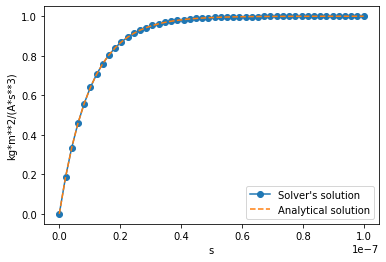

In [4]:
# lets visualize the solver's solution along
# with the analytical solution
fig, ax = plt.subplots()
ech_t = np.linspace(0*s, 10*tau)

ax.plot(ech_t,
        solution.sol(ech_t)[0],
        "-o", 
        label="Solver's solution")
ax.plot(ech_t,
        analytical_solution(ech_t),
        "--",
        label="Analytical solution")
ax.legend()

In [12]:
print((solution.sol(ech_t)[0]/ analytical_solution(ech_t)-1)*100)

[            nan  6.50659914e-02  4.26739969e-02 -2.48627349e-03
 -1.21530454e-02  1.23336934e-03  2.12741657e-04 -8.61517124e-03
 -4.24913218e-03  9.17517376e-03  1.02650454e-02 -1.48950007e-03
 -1.25405664e-02 -6.59874214e-03  4.38860642e-03  7.90683925e-03
  1.62129854e-03 -9.21815606e-03 -1.35626641e-02 -6.10021428e-03
  2.88558322e-03  7.12942648e-03  4.57301468e-03 -3.25857596e-03
 -1.17374258e-02 -1.35648949e-02 -7.68558735e-03 -4.25162696e-04
  4.83081639e-03  6.28549470e-03  3.59206358e-03 -2.25678671e-03
 -9.01744952e-03 -1.32666908e-02 -1.13638004e-02 -6.42653459e-03
 -1.02849727e-03  3.40529747e-03  5.94751006e-03  6.14723792e-03
  4.01282719e-03 -2.05914180e-06 -5.00974856e-03 -9.69774644e-03
 -1.23362084e-02 -1.11315653e-02 -9.06998563e-03 -7.39385775e-03
 -6.03461067e-03 -4.92555702e-03]


## Solve multiple equations

We create various systems with different parameters and use numpy broadcasting : 
 - several resistance
 - several capa
 
The only modification must be : 
 - t_span is the same for all systems, so still a 2-uple
 - must specify initial condition for each system, so y0 is now a N-iterable (for N systems)

In [8]:
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
 
from physipy import units, s, set_favunit, setup_matplotlib
from physipy.integrate import solve_ivp
    
setup_matplotlib()
    
ohm = units["ohm"]
F = units["F"]
V = units["V"]

Rs_, capas_ = np.meshgrid(10000 * ohm + np.linspace(-1000, +1000, num=3)*ohm, 
                          1*10**-12 * F + np.linspace(-0.2, 0.2, num=5)*10**-12*F,
                         )
# in Ohms
R = Rs_.flatten()
R.favunit = ohm
# in Farad
capa = capas_.flatten()
capa.favunit = F
# time constant
tau= R*capa
# Source in volts
Ve = 1 * V
# initial tension in volts
y0 = np.ones_like(R)* 0*V

def RHS_dydt(t, y):
    return 1/(tau)*(Ve - y)
 
t_span = (0*s, 5*np.max(tau))

solution = solve_ivp(
    RHS_dydt,
    t_span,
    y0,
    dense_output=True,
    t_eval=np.linspace(0*s, 5*np.max(tau), num=100),
)
solution

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 56
     njev: 0
      nlu: 0
      sol: <function solve_ivp.<locals>.sol_q at 0x1051a0940>
   status: 0
  success: True
        t: <Quantity : [0.00000000e+00 6.66666667e-10 1.33333333e-09 2.00000000e-09
 2.66666667e-09 3.33333333e-09 4.00000000e-09 4.66666667e-09
 5.33333333e-09 6.00000000e-09 6.66666667e-09 7.33333333e-09
 8.00000000e-09 8.66666667e-09 9.33333333e-09 1.00000000e-08
 1.06666667e-08 1.13333333e-08 1.20000000e-08 1.26666667e-08
 1.33333333e-08 1.40000000e-08 1.46666667e-08 1.53333333e-08
 1.60000000e-08 1.66666667e-08 1.73333333e-08 1.80000000e-08
 1.86666667e-08 1.93333333e-08 2.00000000e-08 2.06666667e-08
 2.13333333e-08 2.20000000e-08 2.26666667e-08 2.33333333e-08
 2.40000000e-08 2.46666667e-08 2.53333333e-08 2.60000000e-08
 2.66666667e-08 2.73333333e-08 2.80000000e-08 2.86666667e-08
 2.93333333e-08 3.00000000e-08 3.06666667e-08 3.13333333e-08
 3.20000000e-08 3.26666667e-08 3

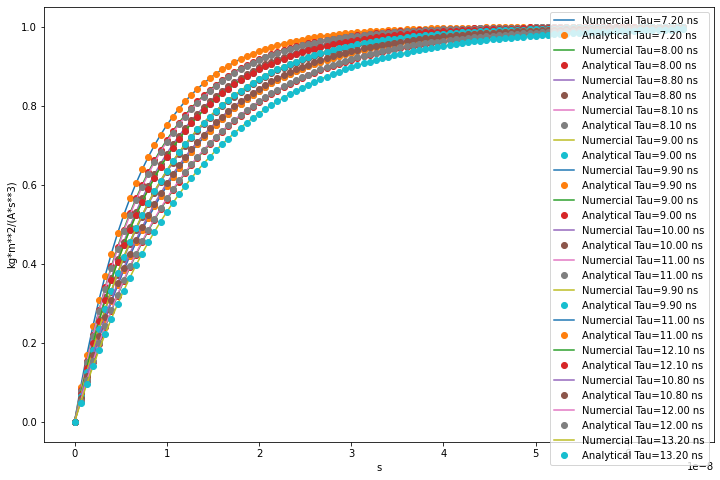

In [9]:
@set_favunit(V)
def analytical_solution(t):
    return (y0-Ve)*np.exp(-t/tau) + Ve
 
ns = units["ns"]
tau.favunit = ns
    
analytical_solutions = analytical_solution(solution.t[:, np.newaxis]).T

fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(R)):
    ax.plot(solution.t,
            solution.y[i],
            label=f"Numercial Tau={tau[i]:.2f}")
    ax.plot(solution.t,
            analytical_solutions[i], 
            "o", 
            label=f"Analytical Tau={tau[i]:.2f}")
ax.legend()

## Performance comparison

In [3]:
def timeit_without_unit():
    import scipy.integrate
    import numpy as np
     
    # in Ohms
    R = 10000
    # in Farad
    capa = 1*10**-12
    # time constant
    tau= R*capa
    # Source in volts
    Ve = 1
    # initial tension in volts
    y0 = [0]

    def RHS_dydt(t, y):
        return 1/(tau)*(source_tension(t) - y)
     
    t_span = (0, 10*tau)
    
    %timeit scipy.integrate.solve_ivp(RHS_dydt, t_span, y0, dense_output=True)
    %timeit scipy.integrate.solve_ivp(RHS_dydt, t_span, y0, dense_output=False)
    

def timeit_with_unit():
    import numpy as np
    from physipy.integrate import solve_ivp     
    from physipy import units, s, set_favunit, setup_matplotlib
        
    setup_matplotlib()
        
    ohm = units["ohm"]
    F = units["F"]
    V = units["V"]
    
    # in Ohms
    R = 10000 * ohm
    # in Farad
    capa = 1*10**-12 * F
    # time constant
    tau= R*capa
    # Source in volts
    Ve = 1 * V
    # initial tension in volts
    y0 = [0*V]
     
    def RHS_dydt(t, y):
        return 1/(tau)*(Ve - y)
     
    t_span = (0*s, 10*tau)

    %timeit solve_ivp(RHS_dydt, t_span, y0, dense_output=True)
    %timeit solve_ivp(RHS_dydt, t_span, y0, dense_output=False)

    
timeit_without_unit()
timeit_with_unit()

995 µs ± 7.37 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
906 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.37 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.27 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


So, yeah, do not use units if performance is important...

# Numerical methods

## Explicit-forward euler, or rectangle from the left

Called explicit because the value of $y_{t+dt}$ is computed using the current-know value of $y(t)$
$$y_{t+dt} - y_t = \int_{t}^{t+dt}f(t, y(t))df \approx dt f(t, y(t)) $$
hence 
$$y_{t+dt} \approx y_t  + dt f(t, y(t)) $$

This method has error $e_1 = \frac{1}{2}dt (dt\cdot slope) = \frac{dt^2}{2}slope$ since the error is the rectangle-triangle with base dt and side $dt slope$. Cumulating on N segments thats divides the total time T with dt sub-segments $N=T/dt$, with get a cumulated error of $E=Ne_1=T/dt \frac{dt^2}{2}slope = \frac{T}{2}dt slope$, hence proportional to dt : we say that the error is of order 1.

## Implicit-backward euler, or rectangle from the right

Called implicit because the value of $y_{t+dt}$ is computed using the same value  $y_{t+dt}$ : it requires the use of another algorithm to resolve the unknown
$$y_{t+dt} - y_t = \int_{t}^{t+dt}f(t, y(t))df \approx dt f(t+dt, y(t+dt))$$
The error of this method is the opposite of that of the explicit method, hence also of order 1.

## Trapezoidal

Mix between left and right rectangle

$$y_{t+dt} - y_t \approx dt \frac{1}{2}\left( f(t, y(t)) + f(t+dt, y(t+dt)) \right)$$

For now this equation is implicit, because $y_{t+dt}$ appears on both sides. We can turn it into explicit using : 
$$y(t+dt) \approx y(t) + dt f(t,y(t))$$
hence
$$y_{t+dt} - y_t \approx dt \frac{1}{2}\left( f(t, y(t)) + f(t+dt, y(t) + dt f(t,y(t))) \right)$$

This method introduces 2 sources of errors : 

## Leap frog
First you calculate the new positions based on the old velocity and the old acceleration. Then you calculate the new acceleration, which is only a function of the new position. And then you calculate the new velocities based on the old velocity and the average of old and new acceleration. 

## Runge-Kutta


 - https://medium.com/geekculture/runge-kutta-numerical-integration-of-ordinary-differential-equations-in-python-9c8ab7fb279c
 - https://www.youtube.com/watch?v=2vslKRPlgo0
 - https://www.youtube.com/watch?v=r-jWnXjwQvk
 - https://www.youtube.com/watch?v=5CXhHx56COo&t=1650s
 - https://perso.crans.org/besson/publis/notebooks/Runge-Kutta_methods_for_ODE_integration_in_Python.html
 - https://www.physagreg.fr/methodes-numeriques/methodes-numeriques-euler-runge-kutta.pdf
 - https://femto-physique.fr/analyse-numerique/runge-kutta.php
 - https://medium.com/intuition/dont-trust-runge-kutta-blindly-be392663fbe4

Note that Runge-Kutta methods do not conserve energy : https://medium.com/intuition/dont-trust-runge-kutta-blindly-be392663fbe4

This method is basically equivalent to Simpson's integral method, that approximate the function by a second-order polynom, ie a parabola, that has same values at bound and middle point.

According to scipy doc : 
Explicit Runge-Kutta methods (‘RK23’, ‘RK45’, ‘DOP853’) should be used for non-stiff problems and implicit methods (‘Radau’, ‘BDF’) for stiff problems [9]. Among Runge-Kutta methods, ‘DOP853’ is recommended for solving with high precision (low values of rtol and atol).

The value of the function is estimated using a certain slope coefficient :
$$y_(k+1) = y_k + dt  \phi(t, y, dt)$$
where $\phi(t, y, dt)$ is a mean slope of y between $t_k$ and $t_{k+1}$.
Order-4 Runge-Kutta needs 4 computations with the first derivative 
- f1 = f(t_k, y_k) : derivative at current point, slope at beginning of segment
- f2 = f(t_k+dt/2, y_k+dt/2 f1) 
- f3 = f(t_k+dt/2, y_k+dt/2 f2) 
- f4 = f(t_k+dt, y_k+dt   f3) 
Then compute mean slope : 
$$y_(k+1) = y_k + \frac{dt}{6} (f1 + 2f2 + 2f3 + f4)$$
The error is of order $t^5$ and cumulated error on N segments is $dt^4$

In [ ]:

def rk4(func, tk, _yk, _dt=0.01, **kwargs):
    """
    single-step fourth-order numerical integration (RK4) method
    func: system of first order ODEs
    tk: current time step
    _yk: current state vector [y1, y2, y3, ...]
    _dt: discrete time step size
    **kwargs: additional parameters for ODE system
    returns: y evaluated at time k+1
    """

    # evaluate derivative at several stages within time interval
    f1 = func(tk, _yk, **kwargs)
    f2 = func(tk + _dt / 2, _yk + (f1 * (_dt / 2)), **kwargs)
    f3 = func(tk + _dt / 2, _yk + (f2 * (_dt / 2)), **kwargs)
    f4 = func(tk + _dt, _yk + (f3 * _dt), **kwargs)

    # return an average of the derivative over tk, tk + dt
    return _yk + (_dt / 6) * (f1 + (2 * f2) + (2 * f3) + f4)

# Exapmple using Euler's explicit method

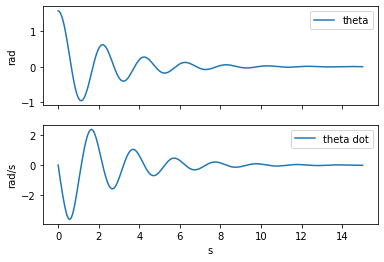

In [15]:
# https://medium.com/towards-data-science/solving-non-linear-differential-equations-numerically-using-the-finite-difference-method-1532d0863755
from physipy import m, s, kg, setup_matplotlib, rad, asqarray
setup_matplotlib()
import numpy as np
import matplotlib.pyplot as plt

N = 100         # in how much sub pieces we should break a 1sec interval
T = 15        *s  # total duration of the simulation
dt = 1*s / N      # dt
g = 9.81      *m/s**2   # acceleration of gravity
L = 1         *m  # pendulum rope length
k = 0.8   *kg/s     # air resistance coefficient
m = 1        *kg   # mass of the pendulum

theta = [np.pi / 2 * rad]     # initial angle
theta_dot = [0 * rad/s]         # initial angular velocity
t = [0*s]

for i in range(int(T/dt)):
    theta_dot.append(theta_dot[-1] - theta_dot[-1] * dt * k / m - np.sin(theta[-1]) * dt * g / L*rad)
    theta.append(theta_dot[-1] * dt + theta[-1])
    t.append((i + 1) * dt)

fig, axes = plt.subplots(2, sharex=True)
axes[0].plot(asqarray(t), asqarray(theta), label='theta')
axes[1].plot(asqarray(t), asqarray(theta_dot), label='theta dot')
axes[0].legend()
axes[1].legend()
plt.show()

# Boundary ODE with shooting method
The shooting methods are developed with the goal of transforming the ODE boundary value problems to an equivalent initial value problems.

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.01-ODE-Boundary-Value-Problem-Statement.html

Consider a pin with temperature at x=0 T0 and x=L T_L, and ambiant temperature Ts.
The heat equation is

$$\frac{d^2T}{dx^2} -\alpha_1(T-T_s) - \alpha_2 (T^4)=0$$


Exemple of the shooting with a shooting canon : we want the ball to be at height 50m at time 5s : 
https://pythonnumericalmethods.berkeley.edu/notebooks/chapter23.02-The-Shooting-Method.html

9.80665 m/s**2


/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:716: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")
/Users/mocquin/MYLIB10/MODULES/physipy/physipy/quantity/quantity.py:716: UserWarning: The unit of the quantity is stripped for __array_struct__
  warnings.warn(f"The unit of the quantity is stripped for {item}")
/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/base.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y0 = np.asarray(y0)


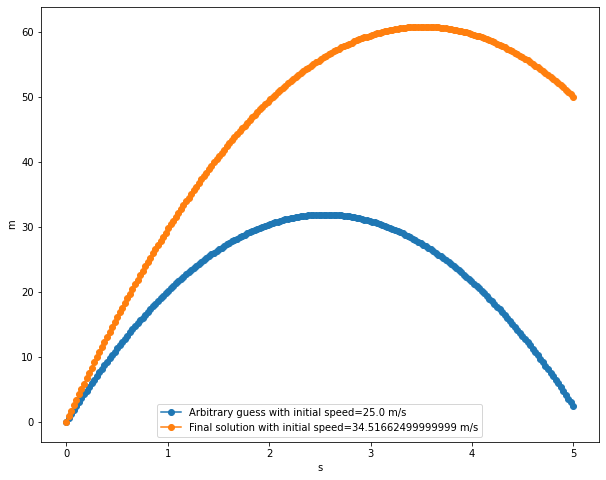

In [1]:
     
                   
 # Shooting method : turn a ODE into a root finding problem        
                   
import numpy as np
import matplotlib.pyplot as plt

from physipy import m, s, constants, units, setup_matplotlib, asqarray
from physipy.integrate import solve_ivp as solve_ivp_q
from physipy.optimize import root

setup_matplotlib()
g_acc = constants["g"]
print(g_acc)

%matplotlib inline

NS = 200

def F(t, Y):
    """RHS of the equation where the left side is dY/dt
    with Y=[y, v]"""
    yp = Y[1]
    ypp = -g_acc
    return np.array([yp, ypp], dtype=object)


t_span = np.linspace(0, 5, NS)*s
# initial state vector
Y0 = np.array([y0:=0*m,
               v0:=25*m/s], dtype=object)
# solution with guessed initial condition v0 at 25m/s
sol = solve_ivp_q(F,
                  [0, 5]*s, 
                  Y0, 
                  t_eval = t_span)

fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(sol.t, sol.y[0],"-o", label=f"Arbitrary guess with initial speed={v0}")


# notice that the initial position y0 is kept
# also notice that while the vector state has 2 elements, the resolution
# is made in 1D on the initial speed only
def objective(v0):
    sol = solve_ivp_q(F, 
                      [0, 5]*s, 
                      np.array([y0, 
                                v0], dtype=object),
                      t_eval = t_span)
    # extract the y-vector giving the position along the time
    y = sol.y[0]
    # return the metric to find root : the last position vs the wanted last position at 50m
    return y[-1] - 50*m

# solve for the good initial speed, with initial guess at 10m/s
v0_sol = root(objective, 10*m/s)

# compute the full resolution along time given the right initial speed v0_sol
final_sol = solve_ivp_q(F,
                  [0, 5]*s,  
                  np.array([y0, v0_sol], dtype=object),
                  t_eval = t_span)

ax.plot(final_sol.t, final_sol.y[0], "-o", label=f"Final solution with initial speed={v0_sol}")
ax.legend()

# Finite difference method for Partial Differential Equation : Heat Equation

https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a

The heat equation is basicaly a partial differential equation that mixes time and space : 

$$ \frac{\partial u}{\partial t} - \alpha \nabla u = 0 $$


with $\alpha$ a diffusivity constant. More precisely in 2D : 

$$\frac{\partial u}{\partial t} - \alpha \left( \frac{\partial^2 u}{\partial x^2} +  \frac{\partial^2 u}{\partial y^2}  \right) = 0$$


Using Finite-Difference method simply consist in approximating the derivatives using small differences between values at small samples.

Using finite-difference, we can rewrite the 2D heat equation : 

$$\frac{u_{i,j}^{k+1} - u_{i,j}^k}{\Delta t} - \alpha \left( \frac{u_{i+1,j}^k - 2 u_{i,j}^k + u_{i-1,k}^k}{\Delta x^2} + \frac{u_{i,j+1}^k - 2 u_{i,j}^k + u_{i,k-1}^k}{\Delta y^2}  \right) = 0$$

Suppose $\Delta x = \Delta y$, we can get : 
$$u_{i,j}^{k+1} = \alpha\frac{\Delta t }{\Delta x^2}\left(u_{i+1,j}^k + u_{i-1,j}^k + u_{i,j+1}^k + u_{i,j-1}^k - 4 u_{i,j}^k  \right)+ u_{i,j}^k$$

For numerical stability, we need : 
$$\Delta t \le \frac{\Delta x^2}{4\alpha}$$

Now about optimization of the loops : 
notice that the equation to compute the temperature at time k+1 is a linear combination for other temperature points at time k. So this relation can be seen as a linear operation, and so can be writter with a convolution kernel. Picture the heat map at time k as a 2D image, and the heat map at time k+1 as another image that is the result of a convolution of the first image.
Rewriting the equation with $\gamma = \alpha \frac{\Delta t}{\Delta x^2}$, we get : 
$$u_{i,j}^{k+1} = \gamma u_{i+1,j}^k + \gamma u_{i-1,j}^k + \gamma u_{i,j+1}^k + \gamma u_{i,j-1}^k - 4 \gamma u_{i,j}^k +u_{i,j}^k$$
The kernel can be seen as  :
$$K = \begin{pmatrix}
0 & \gamma & 0\\
\gamma & 1-4\gamma & \gamma\\
0 & \gamma & 0\\
\end{pmatrix}
$$
with local heatmap =
$$\begin{pmatrix}
u_{i-1,j-1}^k & u_{i-1,j}^k & u_{i-1,j+1}^k\\
u_{i,j-1}^k & u_{i,j}^k & u_{i,j+1}^k\\
u_{i+1,j-1}^k & u_{i+1,j}^k & u_{i+1,j+1}^k\\
\end{pmatrix}
$$


Remember the base equation for the sample located at (i,j) :
$$u_{i,j}^{k+1} = \gamma u_{i+1,j}^k + \gamma u_{i-1,j}^k + \gamma u_{i,j+1}^k + \gamma u_{i,j-1}^k - 4 \gamma u_{i,j}^k +u_{i,j}^k$$


This equation is true for all samples within the bounds (so not the ones on the first line, or last line, or first row, or last row). 
Notice that there are 5 "u-variables", namely $
u_{i+1,j}^k$, $u_{i-1,j}^k$, $u_{i,j+1}^k$, $u_{i,j-1}^k$, and $u_{i,j}^k$.

Let's write : 
 - `A = u[ k, 2:  , 1:-1]` to represent $u_{i+1,j}^k$
 - `B = u[ k,  :-2, 1:-1]` to represent $u_{i-1,j}^k$
 - `C = u[ k, 1:-1, 2:  ]` to represent $u_{i,j-1}^k$
 - `D = u[ k, 1:-1,  :-2]` to represent $u_{i,j+1}^k$
 - `E = u[ k, 1:-1, 1:-1]` to represent  $u_{i,j}^k$


where the "1:-1" are here to left the bounds untouched, and k is there because we only use samples at time k to compute samples at time k+1. This way we can write that 

$$u_{i,j}^{k+1} = \gamma A + \gamma B + \gamma C + \gamma D + (1-4\gamma) E$$

And now, the operation of weight-averaging all samples with its neighborhood is done in one operation, for all samples.

In [1]:
import numpy as np

from physipy import m, units, s, K

plate_length = 50 * m
plate_width = 50 * m
max_iter_time = 750 * s

alpha = 2 * m**2/s
delta_x = 1 * m

nk, ni, nj = int(max_iter_time/s), int(plate_length/delta_x), int(plate_width/delta_x)

delta_t = (delta_x ** 2)/(4 * alpha)

# gamma is dimensionless
gamma = (alpha * delta_t) / (delta_x ** 2)
print(gamma)

0.25


In [2]:
# Boundary conditions
u_top = 100.0 *K
u_left = 0.0*K
u_bottom = 0.0*K
u_right = 0.0*K

# Initial condition everywhere inside the grid
u_initial = 0*K

def initialize_u(nk, ni=ni, nj=nj):
    
    # Initialize solution: the grid of u(k, i, j)
    u = np.ones((nk, ni, nj))*u_initial#np.full((nk, ni, nj), u_initial, like=K)

    # Set the boundary conditions
    u[:, 0, :] = u_top
    u[:, :, 0] = u_left
    u[:, -1, :] = u_bottom
    u[:, :, -1] = u_right

    return u
initialize_u(nk)

<Quantity : [[[  0. 100. 100. ... 100. 100.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0. 100. 100. ... 100. 100.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0. 100. 100. ... 100. 100.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 ...

 [[  0. 100. 100. ... 100. 100.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  ...
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]
  [  0.   0.   0. ...   0.   0.   0.]]

 [[  0. 100. 100. ... 100. 100.   0.]


In [25]:
# original code to compute heatmap at each space and time step
def calculate(u):
    nk, ni, nj = u.shape
    for k in range(0, nk-1):
        for i in range(1, ni-1):
            for j in range(1, nj-1):
                u[k + 1, i, j] = gamma * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j]) + u[k][i][j]
    return u

# kernel for the convolution approach
kernel = np.array([
    [0, gamma, 0],
    [gamma, 1-4*gamma, gamma],
    [0, gamma, 0],
])
print(kernel)

[[0.   0.25 0.  ]
 [0.25 0.   0.25]
 [0.   0.25 0.  ]]


In [5]:
# using convolution approach
def calculate_faster(u):
    nk, ni, nj = u.shape
    for k in range(0, nk-1):
        # we get a 4D array that contains all possible 3x3 local heatmaps at time k
        local_maps = np.lib.stride_tricks.sliding_window_view(@u[k], (3,3))
        # sum the product of the kernel and each map
        # and sum each local map
        result = np.sum(kernel * local_maps, axis=(2,3))
        # set the newly computed heatmap at time k+1
        u[k+1, 1:-1, 1:-1] = result
    return u
    

# compute result with each method...
u1 = calculate(initialize_u(nk))
u2 = calculate_faster(initialize_u(nk))
# check that they output the same results
np.all(u1==u2)

In [7]:
print(np.max(np.abs(u1-u2)))

4.263256414560601e-14 K


In [8]:
# and check how much faster the sliding window is compared to nested loops
%timeit calculate(initialize_u(nk))
%timeit calculate_faster(initialize_u(nk))

1min 50s ± 9.89 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
255 ms ± 9.39 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# using indexing approach
def calculate_even_faster(u):
    nk, ni, nj = u.shape
    for k in range(0, nk-1):
        A = u[k, 2:  , 1:-1]
        B = u[k,  :-2, 1:-1]
        C = u[k, 1:-1, 2:  ]
        D = u[k, 1:-1,  :-2]
        E = u[k, 1:-1, 1:-1]
        result = gamma * (A+B+C+D-4*E) + E 
        # set the newly computed heatmap at time k+1
        u[k+1, 1:-1, 1:-1] = result
    return u
    
# compute results and check it gives the same as before
u3 = calculate_even_faster(initialize_u(nk))
np.all(u3 == u1)

True

In [12]:
# and check again how much faster this method is
%timeit calculate_even_faster(initialize_u(nk))

69.8 ms ± 804 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [2]:
# create new map and display result
u3 = calculate_even_faster(initialize_u(750, 100, 100))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
mappable = ax.imshow(u3[-1], interpolation=None, cmap=plt.cm.jet)
fig.colorbar(mappable, label="Temperature (°C)")
ax.set_xlabel("x samples")
ax.set_xlabel("y samples")
fig.suptitle("Temperature map at final time")
fig.tight_layout()

# Gradient

Numpy's gradient : The gradient is computed using second order accurate central differences in the interior points and either first or second order accurate one-sides (forward or backwards) differences at the boundaries. The returned gradient hence has the same shape as the input array.

In [1]:
import numpy as np
from physipy import m

In [2]:
f = np.array([1, 2, 4, 7, 11, 16], dtype=float)
print(np.gradient(f))
print(np.gradient(f, 0.5))

[1.  1.5 2.5 3.5 4.5 5. ]
[ 2.  3.  5.  7.  9. 10.]


In [4]:
f = np.array([1, 2, 4, 7, 11, 16], dtype=float) * m
print(np.gradient(f, 0.5))
print(np.gradient(f, 0.5*m))

[ 2.  3.  5.  7.  9. 10.] m
[ 2.  3.  5.  7.  9. 10.]
